<a href="https://colab.research.google.com/github/tth-97/AI-practice/blob/main/batch_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
from PIL import Image

In [ ]:
from tqdm import tqdm

In [2]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
print(device)

cuda


In [4]:
##### AutoEncoder 모델 코드 #####

class Encoder(nn.Module):
    def __init__(self,):
        super(Encoder, self).__init__()
        self.encode = nn.Sequential(nn.Conv2d(3, 6, 5, 1, 0),
                                    nn.BatchNorm2d(6),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2, 2),
                                    nn.Conv2d(6, 16, 5, 1, 0),
                                    nn.BatchNorm2d(16),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2, 2),
        )
    def forward(self, input):
        return self.encode(input)


class Decoder(nn.Module):
    def __init__(self, ):
        super(Decoder, self).__init__()
        self.decode = nn.Sequential(nn.Conv2d(16, 16, 13, 1, 12),
                                    nn.BatchNorm2d(16),
                                    nn.ReLU(),
                                    nn.Conv2d(16, 16, 13, 1, 12),
                                    nn.BatchNorm2d(16),
                                    nn.ReLU(),
                                    nn.Conv2d(16, 6, 13, 1, 12),
                                    nn.BatchNorm2d(6),
                                    nn.ReLU(),
                                    nn.Conv2d(6, 6, 13, 1, 12),
                                    nn.BatchNorm2d(6),
                                    nn.ReLU(),
                                    nn.Conv2d(6, 6, 13, 1, 12),
                                    nn.BatchNorm2d(6),
                                    nn.ReLU(),
                                    nn.Conv2d(6, 3, 19, 1, 18),
                                    nn.BatchNorm2d(3),
                                    nn.Tanh(),
        )
    def forward(self, input):
        return self.decode(input)
        
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self, input):
        z = self.encoder(input)
        x_hat = self.decoder(z)
        return z, x_hat

In [5]:
transform = transforms.Compose([transforms.Resize((100, 100)),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.Flowers102(root="StanfordCars/", 
                    split='train', 
                    transform=transform,
                    download=True)
test_dataset = torchvision.datasets.Flowers102(root="StanfordCars/", 
                    split='test',
                    transform=transform,
                    download=True)

100%|██████████| 344862509/344862509 [00:06<00:00, 57398401.53it/s]


Extracting StanfordCars/flowers-102/102flowers.tgz to StanfordCars/flowers-102


100%|██████████| 502/502 [00:00<00:00, 1584304.45it/s]


100%|██████████| 14989/14989 [00:00<00:00, 18811616.59it/s]


In [ ]:
import matplotlib.pyplot as plt

sample = train_dataset[0][0].numpy()
print(sample)
sample = np.transpose(sample,(1,2,0))

fig, ax = plt.subplots(1,1)
ax.set_title('data')
ax.set_axis_off()
ax.imshow(sample)
plt.show()

In [6]:
##### AutoEncoder 학습 코드 #####

batch_size = 255

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

autoencoder = AutoEncoder().to(device)
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
criterion = nn.MSELoss()

epochs = 100
train_avg_costs = []

autoencoder.train()
for epoch in range(epochs):
    autoencoder.train()
    avg_cost = 0
    total_batch_num = len(train_dataloader)
    
    for b_x, b_y in train_dataloader:
        b_x = b_x.to(device)
        z, b_x_hat = autoencoder(b_x) # forward propagation
        loss = criterion(b_x_hat, b_x) # get cost
        
        avg_cost += loss / total_batch_num
        optimizer.zero_grad()
        loss.backward() # backward propagation
        optimizer.step() # update parameters
    train_avg_costs.append(avg_cost.detach())
    print('Epoch : {} / {}, cost : {}'.format(epoch+1, epochs, avg_cost))

Epoch : 1 / 100, cost : 0.38956040143966675
Epoch : 2 / 100, cost : 0.32226935029029846
Epoch : 3 / 100, cost : 0.30677682161331177
Epoch : 4 / 100, cost : 0.29333168268203735
Epoch : 5 / 100, cost : 0.28751814365386963
Epoch : 6 / 100, cost : 0.28302305936813354
Epoch : 7 / 100, cost : 0.27844077348709106
Epoch : 8 / 100, cost : 0.2758181095123291
Epoch : 9 / 100, cost : 0.2729821801185608
Epoch : 10 / 100, cost : 0.27033302187919617
Epoch : 11 / 100, cost : 0.2677587866783142
Epoch : 12 / 100, cost : 0.2652435302734375
Epoch : 13 / 100, cost : 0.2620594799518585
Epoch : 14 / 100, cost : 0.2595936059951782
Epoch : 15 / 100, cost : 0.25668245553970337
Epoch : 16 / 100, cost : 0.25391101837158203
Epoch : 17 / 100, cost : 0.2510717809200287
Epoch : 18 / 100, cost : 0.24687251448631287
Epoch : 19 / 100, cost : 0.2445715367794037
Epoch : 20 / 100, cost : 0.24296268820762634
Epoch : 21 / 100, cost : 0.23905310034751892
Epoch : 22 / 100, cost : 0.23497290909290314
Epoch : 23 / 100, cost : 0.

In [7]:
print(train_avg_costs)

[tensor(0.3896, device='cuda:0'), tensor(0.3223, device='cuda:0'), tensor(0.3068, device='cuda:0'), tensor(0.2933, device='cuda:0'), tensor(0.2875, device='cuda:0'), tensor(0.2830, device='cuda:0'), tensor(0.2784, device='cuda:0'), tensor(0.2758, device='cuda:0'), tensor(0.2730, device='cuda:0'), tensor(0.2703, device='cuda:0'), tensor(0.2678, device='cuda:0'), tensor(0.2652, device='cuda:0'), tensor(0.2621, device='cuda:0'), tensor(0.2596, device='cuda:0'), tensor(0.2567, device='cuda:0'), tensor(0.2539, device='cuda:0'), tensor(0.2511, device='cuda:0'), tensor(0.2469, device='cuda:0'), tensor(0.2446, device='cuda:0'), tensor(0.2430, device='cuda:0'), tensor(0.2391, device='cuda:0'), tensor(0.2350, device='cuda:0'), tensor(0.2323, device='cuda:0'), tensor(0.2306, device='cuda:0'), tensor(0.2258, device='cuda:0'), tensor(0.2236, device='cuda:0'), tensor(0.2199, device='cuda:0'), tensor(0.2178, device='cuda:0'), tensor(0.2145, device='cuda:0'), tensor(0.2125, device='cuda:0'), tensor(0.

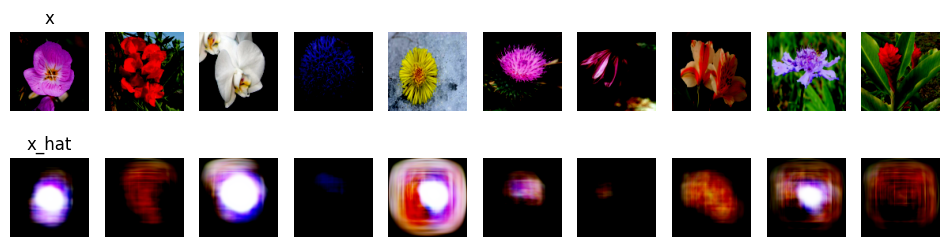

In [8]:
# autoencoder 학습 결과 확인 #

import matplotlib.pyplot as plt
import numpy as np

autoencoder.eval()
test_samples = torch.zeros((10, 3, 100, 100))
for i in range(10):
  test_samples[i] = test_dataset[100*i][0]
test_samples = test_samples.to(device)
z, test_output = autoencoder(test_samples)

fig, ax = plt.subplots(2, 10, figsize=(12,3))
ax[0][0].set_title('x')
ax[1][0].set_title('x_hat')
for i in range(10):
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  ax[0][i].imshow(np.transpose(test_samples[i].detach().cpu().numpy(), (1,2,0)))
  ax[1][i].imshow(np.transpose(test_output[i].detach().cpu().numpy(), (1,2,0)))
plt.show()


In [9]:
##### Classifier 모델 코드 #####

class Classifier(nn.Module):
    def __init__(self, ):
        super(Classifier, self).__init__()
        self.classify = nn.Sequential(
                                      nn.Conv2d(16, 32, 3, 1, 0),
                                      nn.BatchNorm2d(32),
                                      nn.ReLU(),
                                      nn.MaxPool2d(2, 2),
                                      nn.Conv2d(32, 64, 3, 1, 0),
                                      nn.BatchNorm2d(64),
                                      nn.ReLU(),
                                      nn.MaxPool2d(2, 2),
                                      nn.Flatten(),
                                      nn.Linear(64*4*4, 512),
                                      nn.BatchNorm1d(512),
                                      nn.ReLU(),
                                      nn.Linear(512, 102)
        )
    def forward(self, input):
        return self.classify(input)

In [10]:
##### Classifier 학습 코드 #####

classifier = Classifier().to(device)
cls_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    [
        {"params": autoencoder.parameters(), "lr": 0.001},
        {"params": classifier.parameters(), "lr": 0.001},
    ]
)

autoencoder.train()
classifier.train()
total_batch_num = len(train_dataloader)

epochs = 60
classifier_avg_costs = []

for epoch in range(epochs):
  avg_cost = 0

  for b_x, b_y in train_dataloader:
    b_x = b_x.to(device)
    b_y = b_y.to(device)
    z, b_x_hat = autoencoder(b_x)
    logits = classifier(z) # classification
    loss = cls_criterion(logits, b_y) # get cost

    avg_cost += loss / total_batch_num

    optimizer.zero_grad()
    loss.backward() # backward propagation
    optimizer.step() # update param
  
  classifier_avg_costs.append(avg_cost.detach())
  print('Epoch : {} / {}, cost : {}'.format(epoch+1, epochs, avg_cost))

Epoch : 1 / 60, cost : 4.507926940917969
Epoch : 2 / 60, cost : 3.497001886367798
Epoch : 3 / 60, cost : 2.918870449066162
Epoch : 4 / 60, cost : 2.4189260005950928
Epoch : 5 / 60, cost : 1.9641536474227905
Epoch : 6 / 60, cost : 1.5600025653839111
Epoch : 7 / 60, cost : 1.189941644668579
Epoch : 8 / 60, cost : 0.8708600401878357
Epoch : 9 / 60, cost : 0.6262471675872803
Epoch : 10 / 60, cost : 0.4247322380542755
Epoch : 11 / 60, cost : 0.2888886034488678
Epoch : 12 / 60, cost : 0.19196070730686188
Epoch : 13 / 60, cost : 0.13974988460540771
Epoch : 14 / 60, cost : 0.09831209480762482
Epoch : 15 / 60, cost : 0.074376180768013
Epoch : 16 / 60, cost : 0.06088457256555557
Epoch : 17 / 60, cost : 0.04774864763021469
Epoch : 18 / 60, cost : 0.04008607938885689
Epoch : 19 / 60, cost : 0.03399234265089035
Epoch : 20 / 60, cost : 0.030161544680595398
Epoch : 21 / 60, cost : 0.026869606226682663
Epoch : 22 / 60, cost : 0.024375157430768013
Epoch : 23 / 60, cost : 0.022361023351550102
Epoch : 24

In [11]:
print(classifier_avg_costs)

[tensor(4.5079, device='cuda:0'), tensor(3.4970, device='cuda:0'), tensor(2.9189, device='cuda:0'), tensor(2.4189, device='cuda:0'), tensor(1.9642, device='cuda:0'), tensor(1.5600, device='cuda:0'), tensor(1.1899, device='cuda:0'), tensor(0.8709, device='cuda:0'), tensor(0.6262, device='cuda:0'), tensor(0.4247, device='cuda:0'), tensor(0.2889, device='cuda:0'), tensor(0.1920, device='cuda:0'), tensor(0.1397, device='cuda:0'), tensor(0.0983, device='cuda:0'), tensor(0.0744, device='cuda:0'), tensor(0.0609, device='cuda:0'), tensor(0.0477, device='cuda:0'), tensor(0.0401, device='cuda:0'), tensor(0.0340, device='cuda:0'), tensor(0.0302, device='cuda:0'), tensor(0.0269, device='cuda:0'), tensor(0.0244, device='cuda:0'), tensor(0.0224, device='cuda:0'), tensor(0.0218, device='cuda:0'), tensor(0.0191, device='cuda:0'), tensor(0.0181, device='cuda:0'), tensor(0.0167, device='cuda:0'), tensor(0.0154, device='cuda:0'), tensor(0.0151, device='cuda:0'), tensor(0.0143, device='cuda:0'), tensor(0.

In [12]:
##### Classifier 정확도 측정 코드 #####

correct = 0
total = 0

classifier.eval()
autoencoder.eval()

for b_x, b_y in test_dataloader:
  b_x = b_x.to(device)
  b_y = b_y.to(device)
  with torch.no_grad():
    z, b_x_hat = autoencoder(b_x)
    logits = classifier(z)
  
  predicts = torch.argmax(logits, dim=1)

  total += len(b_y)
  correct += (predicts == b_y).sum().item()

print(f'Accuracy of the netwark on test images: {100 * correct / total} %')


Accuracy of the netwark on test images: 21.71084729224264 %
